# Richards' Equation solver for 100 m sand column

A. Ireson

Official version of code is here: https://github.com/amireson/RichardsEquation_improved

In [1]:
from matplotlib import pyplot as pl
import numpy as np
import pandas as pd
import time

from numba import jit
from lib.MyNumba import MakeDictFloat

# Import a library that contains soil moisture properties and functions
from lib import vanGenuchten_numba as vg
from lib import Richards as re
from lib.plots import InfiltrationPlot
from lib.plots import SimpleBalancePlot

from lib import saveload as sl

    Upper boundary condition: zero runoff, 100% infiltration
    Lower boundary condition: Free drainage


In [2]:
# Choose run configuration - steady or dynamic boundaries, with/without plant uptake:
# Set soil properties:
# parsimport=vg.HygieneSandstone()
parsimport={'thetaR': 0.153, 'thetaS': 0.25, 'alpha': 0.79, 'n': 10.4, 'm': 0.9038461538461539, 'Ks': 1.08, 'neta': 0.5, 'Ss': 1e-06, 'rootdepth': 0.2}

# Set time and space grid:
t=np.arange(0,1001)
grid={}
grid['t']=t
grid['dz']=0.05
grid['ProfileDepth']=100.

# Initial conditions: Choose from options
IC={}
# IC['type']='Hydrostatic'
IC['type']='SteadyInfiltration'
IC['value']=0.0005

# Boundary conditions: Choose from options
BC={}
BC['qIt']=np.array([0,9.99,10,14.99,15,1e6])
BC['qI']=np.array([0,0,0.05,0.05,0,0])+0.0005
BC['PEt']=np.array([0.0,1e6])
BC['PE']=np.array([0.,0.])

BC['upper']='NoRunoff'
BC['lower']='Free'

# fn='run'
# sl.dict2json(grid,fn+'/grid.json')
# sl.dict2json(IC,fn+'/IC.json')
# sl.dict2json(BC,fn+'/BC.json')
# parsimport={}
# for k in pars:
#     parsimport[k]=pars[k]
# sl.dict2json(parsimport,fn+'/pars.json')

In [3]:
# %load RunRichards.py
# Import all of the basic libraries (you will always need these)
# IC=sl.json2dict('run/IC.json')
# BC=sl.json2dict('run/BC.json')
# grid=sl.json2dict('run/grid.json')
# parsimport=sl.json2dict('run/pars.json')

pars=MakeDictFloat()
for k in parsimport:
    pars[k]=parsimport[k]

tic=time.time()
ts,state=re.runmodel(IC,BC,pars,grid)
print('runtime = %.1f seconds'%(time.time()-tic))

ts.to_csv('TimeSeriesOutput.csv')
np.savetxt("time.csv", state['t'], delimiter=",")
np.savetxt("depth.csv", state['z'], delimiter=",")
np.savetxt("theta.csv", state['theta'], delimiter=",")
np.savetxt("psi.csv", state['psi'], delimiter=",")

    Initial condition: steady-state infiltration profile

Solving Richards' Equation


/Users/ani378/Desktop/ForMingbin/lib/vanGenuchten.py:18: RuntimeWarning: invalid value encountered in power
  Se=(1+(psi*-pars['alpha'])**pars['n'])**(-pars['m'])
/Users/ani378/Desktop/ForMingbin/lib/vanGenuchten.py:25: RuntimeWarning: invalid value encountered in power
  Se=(1+(psi*-pars['alpha'])**pars['n'])**(-pars['m'])


    Water balance information:
Infiltration                  0.7500 mm
Drainage                      0.7500 mm
Actual evaporation            0.0000 mm
Potential evaporation         0.0000 mm
Change in storage             -0.0000 mm
Balance                       0.0000 mm
Model run successfully
runtime = 53.0 seconds


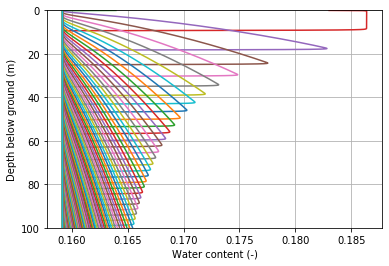

In [4]:
# state=sl.load('run/state')
# ts=sl.load('run/ts')

i=np.arange(0,1000,5)
pl.plot(state['theta'][i,:].T,state['z'])
pl.ylim(100,0)
pl.ylabel('Depth below ground (m)')
pl.xlabel('Water content (-)')
pl.grid()
pl.savefig('ForLee.png')


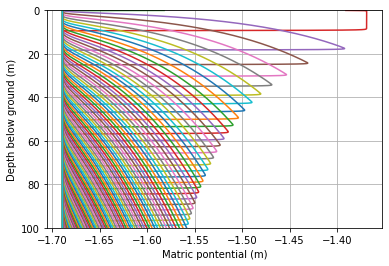

In [5]:
i=np.arange(0,1000,5)
pl.plot(state['psi'][i,:].T,state['z'])
pl.ylim(100,0)
pl.ylabel('Depth below ground (m)')
pl.xlabel('Matric pontential (m)')
pl.grid()
pl.savefig('ForLee.png')
